# <center><b><u>The Spark Foundation</u></b></center>
## Task 4 : Stock Market Prediction using Numerical & Textual Analysis
### Sentimental Analysis
In this task we will create a Hybrid Model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

## Name : Mansi Panchal   

#### Step 1 - Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Step 2 - Loading Datasets 

In [2]:
td = pd.read_csv('Combined_News_DJIA.csv') # Textual Data
nd = pd.read_csv('upload_DJIA_table.csv') # Numerical Data

In [3]:
print("Textual Data")
td.head()

Textual Data


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [4]:
print("Numerical Data")
nd.head()

Numerical Data


,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


#### Step - 3 Combine Data

In [5]:
headlines = []
for row in range(0,len(td.index)):
    headlines.append(' '.join(str(x) for x in td.iloc[row,2:27]))

#### Step - 4 Data Cleaning

In [6]:
import re

clean_headlines = []
for i in range(0, len(headlines)):
  clean_headlines.append(re.sub("b[(')]+", '', headlines[i] ))
  clean_headlines[i] = re.sub('b[(")]+', '', clean_headlines[i] )
  clean_headlines[i] = re.sub("\'", '', clean_headlines[i] )

td['Combined_News'] = clean_headlines

#### Step - 5 Frequancy Analysis

In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [8]:
import collections
import matplotlib.cm as cm
from matplotlib.pyplot import figure
from matplotlib import rcParams
from wordcloud import WordCloud as wc
from wordcloud import STOPWORDS as sw

In [9]:
print(td.columns)

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'Combined_News'],
      dtype='object')


In [10]:
td.isnull().sum()

Date             0
Label            0
Top1             0
Top2             0
Top3             0
Top4             0
Top5             0
Top6             0
Top7             0
Top8             0
Top9             0
Top10            0
Top11            0
Top12            0
Top13            0
Top14            0
Top15            0
Top16            0
Top17            0
Top18            0
Top19            0
Top20            0
Top21            0
Top22            0
Top23            1
Top24            3
Top25            3
Combined_News    0
dtype: int64

In [11]:
all_headlines = ' '.join(td['Combined_News'].str.lower())
SW = sw
SW.add('will')
WC = wc(stopwords=SW).generate(all_headlines)

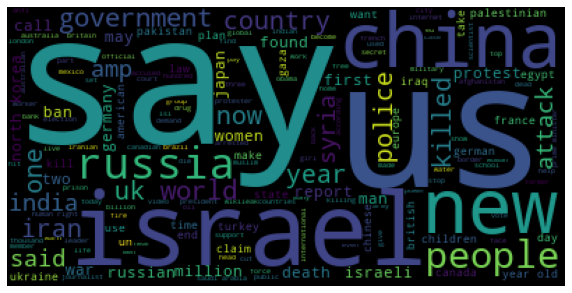

In [12]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(WC)
plt.axis("off")
plt.show()

#### Step 6 - Visualizing Data

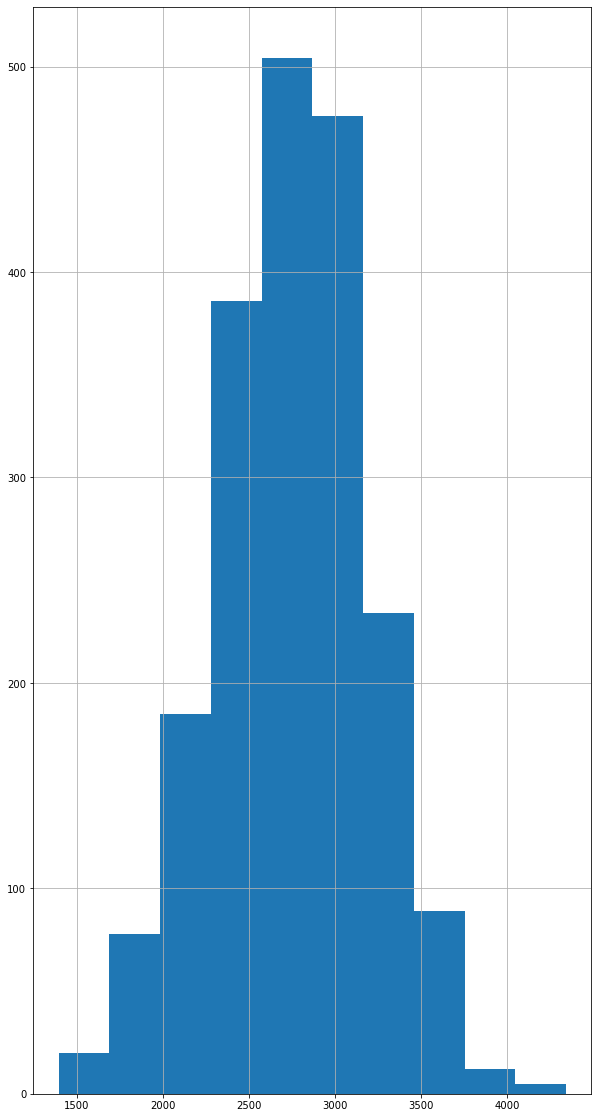

<Figure size 432x288 with 0 Axes>

In [13]:
td['Combined_News'].str.len().hist()
plt.figure(figsize=(6,4))
plt.show()

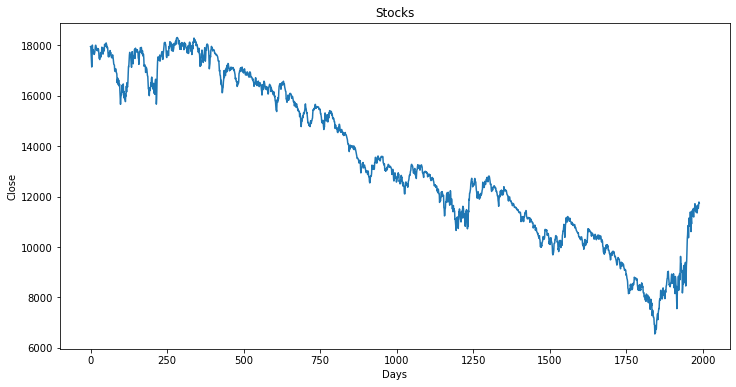

In [14]:
plt.figure(figsize=(12,6))
plt.title('Stocks')
plt.xlabel('Days')
plt.ylabel('Close')
plt.plot(nd['Close'])
plt.show()

#### Step 7 - Applying Auto ARIMA Model

In [15]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [16]:
from pmdarima.arima import auto_arima as aa

nd.fillna(0,inplace=True)

train = nd[:783]
valid = nd[783:]

training = train['Close']
validation = valid['Close']

In [ ]:
model = aa(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=34.58 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=10318.091, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=10080.787, Time=5.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=15.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=10319.580, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=9992.238, Time=24.43 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=83.08 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=18.01 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=9990.515, Time=16.89 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=10078.792, Time=3.80 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=65.99 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=12.91 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=9992.226, Time=24.30 sec


In [20]:
fc = model.predict(n_periods=1206)
forecast = pd.DataFrame(fc,index = valid.index,columns=['Prediction'])
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

9417.371117480012

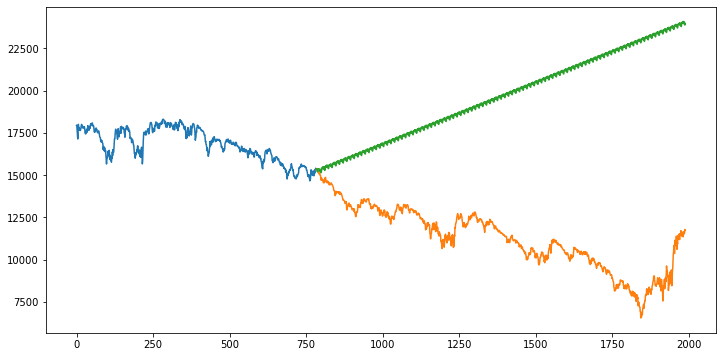

In [21]:
plt.figure(figsize=(12,6))
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

#### Step 8 - Applying Vader Model for Sentimental Analysis

In [24]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.
